<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Избавимся-от-выбросов" data-toc-modified-id="Избавимся-от-выбросов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Избавимся от выбросов</a></span></li><li><span><a href="#Факторы-влияния" data-toc-modified-id="Факторы-влияния-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Факторы влияния</a></span></li><li><span><a href="#Населенные-пункты" data-toc-modified-id="Населенные-пункты-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Населенные пункты</a></span></li><li><span><a href="#Расстояние-до-центра" data-toc-modified-id="Расстояние-до-центра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расстояние до центра</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd


In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [5]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [6]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


Открываем датасет смотрим данные


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00","6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,"23,699.00",2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,"21,421.00",10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,"12,180.00",1.15,1.07,0.00,0.00,1.00,2.00,5.00


### Вывод

Что надо будет сделать и что бросается в глаза 
Есть вбросы квартира с 19 комнатами огромной площадью и потолками в 100 метров 
1. Много где надо будет поменять флоаты на инты 
2. Пропуски 
3. Возможно в locality_name привести все к нижнему регистру 
4. Поправить формат даты и времени 

## Предобработка данных

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим на пропуски 

In [10]:
df['days_exposition'].describe().T

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

Очевидно что потолки меньше 2х метров выброс надо будет поправить 

In [11]:
data_transformed = df.groupby('rooms')['ceiling_height'].transform('mean')
df['ceiling_height'] = df['ceiling_height'].fillna(data_transformed)
df['ceiling_height'].isna().sum()

1

заменим пропущенные значения сгруппировав по столбцу rooms

In [13]:
df[df['ceiling_height'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,"32,250,000.00",374.60,2018-06-09T00:00:00,19,NaN,5.00,264.50,2,NaN,...,27.60,NaN,Санкт-Петербург,"19,497.00","3,574.00",0.00,NaN,2.00,548.00,114.00


Есть один элимент для которого не было группы, удалю его он не должен сильно повлиять на исследование )

In [14]:
df = df.drop(index=[14498],axis = 0)
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20923
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11518
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15619
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

удалил строку 

In [15]:
df[df['floors_total'].isnull()] #посмотреть nan в таблице 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.00",65.20,2018-10-02T00:00:00,2,2.76,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,"39,197.00","12,373.00",1.00,123.00,0.00,NaN,49.00
237,4,"2,438,033.00",28.10,2016-11-23T00:00:00,1,2.72,NaN,20.75,1,NaN,...,NaN,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,251.00
457,4,"9,788,348.00",70.80,2015-08-01T00:00:00,2,2.76,NaN,38.40,12,NaN,...,10.63,0.00,Санкт-Петербург,"37,364.00","8,322.00",2.00,309.00,2.00,706.00,727.00
671,4,"6,051,191.00",93.60,2017-04-06T00:00:00,3,2.77,NaN,47.10,8,NaN,...,16.80,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,123.00
1757,5,"3,600,000.00",39.00,2017-04-22T00:00:00,1,2.72,NaN,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,77.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,"8,500,000.00",63.50,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,"51,340.00","15,363.00",0.00,NaN,1.00,853.00,512.00
22656,4,"4,574,160.00",64.50,2017-04-02T00:00:00,2,2.76,NaN,31.70,20,NaN,...,14.40,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,127.00
22808,0,"14,569,263.00",110.40,2016-11-20T00:00:00,3,2.77,NaN,45.38,6,NaN,...,23.42,0.00,Санкт-Петербург,"19,095.00","4,529.00",0.00,NaN,0.00,NaN,260.00
23590,0,"21,187,872.00",123.30,2017-04-25T00:00:00,3,2.77,NaN,50.40,18,NaN,...,23.60,0.00,Санкт-Петербург,"19,095.00","4,529.00",0.00,NaN,0.00,NaN,104.00


In [16]:
data_transformed = df.groupby('floor')['floors_total'].transform('mean')
df['floors_total'] = df['floors_total'].fillna(data_transformed)
df['floors_total'].isna().sum()

0

Заменим nan в столбце 'floors_total'  на unknown

In [17]:
data_transformed = df.groupby('rooms')['living_area'].transform('mean')
df['living_area'] = df['living_area'].fillna(data_transformed)
df['living_area'].isna().sum()


0

Заменим пропущеные значения на среднее по групперовке по столбцу rooms 

In [18]:
df['is_apartment'] = df['is_apartment'].fillna('unknown')

Пропущенные значения в is_apartment unknown

In [19]:
kitchen_new = (df['kitchen_area'] / df['total_area']).mean()
kitchen_new

0.18736004578146398

Найдем какую долю знимает кухня 

In [20]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*kitchen_new)
df['kitchen_area'].isna().sum()

0

In [21]:
display(df['kitchen_area'].corr(df['total_area']))

0.6625253555106092

Заменим пропуски в kitchen_area

In [22]:
df['balcony'] = df['balcony'].fillna(0)

если балкон не указали предположим, что их нет ) 

In [23]:
df['locality_name'] = df['locality_name'].fillna('unknown')

Заполним пропуски в locality_name врядли мы сможем точно запонить правильно населенный пункт

In [24]:
#df['airports_nearest'] = df['airports_nearest'].fillna(0)
#df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)     
#df['parks_around3000'] = df['parks_around3000'].fillna(0)       
#df['parks_nearest'] = df['parks_nearest'].fillna(0)           
#df['ponds_around3000'] = df['ponds_around3000'].fillna(0)     
#df['ponds_nearest'] = df['ponds_nearest'].fillna(0)
df['cityCenters_nearest'] = pd.to_numeric(df['cityCenters_nearest'], errors='coerce')

если аэропорт или парк не указали, скроее всего он отсутсвует, но думаю можно попробывать отфильтровать по населнным пунктам и посмотреть по картам правда ли это ) По поводу расстояния до центра та же позиция)

In [25]:
df[df['days_exposition'].isnull()] #посмотрим наны 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,unknown,...,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,2.76,24.00,31.74,22,unknown,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
44,13,"5,350,000.00",40.00,2018-11-18T00:00:00,1,2.72,22.00,17.89,3,unknown,...,7.49,1.00,Санкт-Петербург,"30,471.00","11,603.00",1.00,620.00,1.00,"1,152.00",NaN
45,17,"5,200,000.00",50.60,2018-12-02T00:00:00,2,2.65,9.00,30.30,7,unknown,...,7.00,0.00,Санкт-Петербург,"30,011.00","12,872.00",0.00,NaN,0.00,NaN,NaN
46,17,"6,600,000.00",52.10,2019-01-31T00:00:00,2,2.60,24.00,29.70,9,unknown,...,8.30,2.00,Санкт-Петербург,"15,114.00","12,702.00",0.00,NaN,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,"21,400,000.00",145.00,2018-11-02T00:00:00,4,3.00,26.00,71.40,17,unknown,...,15.60,0.00,Санкт-Петербург,"11,827.00","11,459.00",0.00,NaN,0.00,NaN,NaN
23685,15,"2,490,000.00",31.00,2019-01-24T00:00:00,1,2.50,5.00,17.30,5,unknown,...,5.60,1.00,Ломоносов,"48,393.00","51,818.00",0.00,NaN,0.00,NaN,NaN
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,unknown,...,13.83,0.00,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,2.76,3.00,29.70,1,unknown,...,10.62,0.00,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y.%m.%d %H:%M')

In [27]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [28]:
df['week_day'] = df['first_day_exposition'].dt.strftime('%A')
df['week_day1'] = df['first_day_exposition'].dt.strftime('%u')
df['month'] = df['first_day_exposition'].dt.strftime('%B')
df['year'] = df['first_day_exposition'].dt.strftime('%Y')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,week_day,week_day1
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,unknown,...,1.00,482.00,2.00,755.00,NaN,3,March,2019,Thursday,4
1,7,"3,350,000.00",40.40,2018-12-04,1,2.72,11.00,18.60,1,unknown,...,0.00,NaN,0.00,NaN,81.00,1,December,2018,Tuesday,2
2,10,"5,196,000.00",56.00,2015-08-20,2,2.76,5.00,34.30,4,unknown,...,1.00,90.00,2.00,574.00,558.00,3,August,2015,Thursday,4
3,0,"64,900,000.00",159.00,2015-07-24,3,2.77,14.00,47.39,9,unknown,...,2.00,84.00,3.00,234.00,424.00,4,July,2015,Friday,5
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,unknown,...,2.00,112.00,1.00,48.00,121.00,1,June,2018,Tuesday,2


In [29]:
#df.groupby('days_exposition')['first_day_exposition'].plot.bar()

In [30]:
df[df['days_exposition'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,week_day,week_day1
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,unknown,...,1.00,482.00,2.00,755.00,NaN,3,March,2019,Thursday,4
7,5,"7,915,000.00",71.60,2019-04-18,2,2.76,24.00,31.74,22,unknown,...,0.00,NaN,0.00,NaN,NaN,3,April,2019,Thursday,4
44,13,"5,350,000.00",40.00,2018-11-18,1,2.72,22.00,17.89,3,unknown,...,1.00,620.00,1.00,"1,152.00",NaN,6,November,2018,Sunday,7
45,17,"5,200,000.00",50.60,2018-12-02,2,2.65,9.00,30.30,7,unknown,...,0.00,NaN,0.00,NaN,NaN,6,December,2018,Sunday,7
46,17,"6,600,000.00",52.10,2019-01-31,2,2.60,24.00,29.70,9,unknown,...,0.00,NaN,0.00,NaN,NaN,3,January,2019,Thursday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,"21,400,000.00",145.00,2018-11-02,4,3.00,26.00,71.40,17,unknown,...,0.00,NaN,0.00,NaN,NaN,4,November,2018,Friday,5
23685,15,"2,490,000.00",31.00,2019-01-24,1,2.50,5.00,17.30,5,unknown,...,0.00,NaN,0.00,NaN,NaN,3,January,2019,Thursday,4
23694,9,"9,700,000.00",133.81,2017-03-21,3,3.70,5.00,73.30,3,unknown,...,1.00,796.00,3.00,381.00,NaN,1,March,2017,Tuesday,2
23696,18,"2,500,000.00",56.70,2018-02-11,2,2.76,3.00,29.70,1,unknown,...,NaN,NaN,NaN,NaN,NaN,6,February,2018,Sunday,7


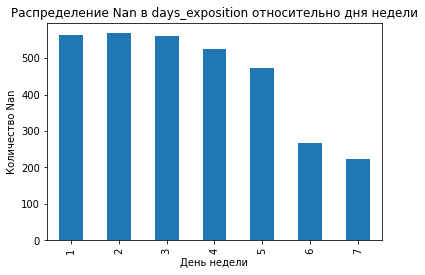

In [31]:
df['days_exposition'].fillna(-1, inplace=True)
df_111 = df.query('days_exposition == -1')
fig, ay = plt.subplots()
df_111.groupby('week_day1')['days_exposition'].count().plot(kind='bar', title='abc')
ay.set_xlabel('День недели')
ay.set_ylabel('Количество Nan')
ay.set_title('Распределение Nan в days_exposition относительно дня недели')
plt.show()

In [32]:
df[df['days_exposition'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,week_day,week_day1


In [33]:
#df.groupby(['days_exposition'])['last_price']
#df.plot.bar(x = 'last_price', y = 'days_exposition')

In [34]:
#df.groupby(['days_exposition'])['last_price'].plot(kind='bar',x = 'days_exposition', y = 'last_price')

In [35]:
#df['days_exposition'] = df['days_exposition'].fillna(0)

<AxesSubplot:>

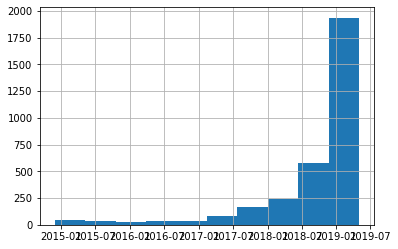

In [36]:
# Код ревьюера
df.query('days_exposition == -1')['first_day_exposition'].hist()

Посмотрел пропуски days_exposition но так и не уивдел взимосвязи, как бы их заполнить, пока заменим на 0

In [37]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15619
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
weekday                     0
month                       0
year                        0
week_day                    0
week_day1                   0
dtype: int64

In [38]:
#df['ceiling_height'] = df['ceiling_height'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df['last_price'] = df['last_price'].astype(int)
df['total_area'] = df['total_area'].astype(int)
df['living_area'] = df['living_area'].astype(int)
df['kitchen_area'] = df['kitchen_area'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df['living_area'] = df['living_area'].astype(int) 
#df['airports_nearest'] = df['airports_nearest'].astype(int)
df['cityCenters_nearest'] = pd.to_numeric(df['cityCenters_nearest'], errors='coerce')
#df['cityCenters_nearest'] = df['cityCenters_nearest'].astype(int)
#df['parks_around3000'] = df['parks_around3000'].astype(int)
#df['parks_nearest'] = df['parks_nearest'].astype(int)
#df['ponds_around3000'] = df['ponds_around3000'].astype(int)
#df['ponds_nearest'] = df['ponds_nearest'].astype(int)
df['days_exposition'] = df['days_exposition'].astype(int)

In [39]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y.%m.%d %H:%M')

In [40]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,week_day,week_day1
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,unknown,...,1.00,482.00,2.00,755.00,-1,3,March,2019,Thursday,4
1,7,3350000,40,2018-12-04,1,2.72,11,18,1,unknown,...,0.00,NaN,0.00,NaN,81,1,December,2018,Tuesday,2
2,10,5196000,56,2015-08-20,2,2.76,5,34,4,unknown,...,1.00,90.00,2.00,574.00,558,3,August,2015,Thursday,4
3,0,64900000,159,2015-07-24,3,2.77,14,47,9,unknown,...,2.00,84.00,3.00,234.00,424,4,July,2015,Friday,5
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,unknown,...,2.00,112.00,1.00,48.00,121,1,June,2018,Tuesday,2
5,10,2890000,30,2018-09-10,1,2.72,12,14,5,unknown,...,NaN,NaN,NaN,NaN,55,0,September,2018,Monday,1
6,6,3700000,37,2017-11-02,1,2.72,26,10,6,unknown,...,0.00,NaN,0.00,NaN,155,3,November,2017,Thursday,4
7,5,7915000,71,2019-04-18,2,2.76,24,31,22,unknown,...,0.00,NaN,0.00,NaN,-1,3,April,2019,Thursday,4
8,20,2900000,33,2018-05-23,1,2.72,27,15,26,unknown,...,NaN,NaN,NaN,NaN,189,2,May,2018,Wednesday,3
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,unknown,...,0.00,NaN,0.00,NaN,289,6,February,2017,Sunday,7


### Вывод 

Зполнил пропуски там где смог) 
Поменяли значения с float на int отбросив дробную часть
Убрали секунды в дататайм так как там всегда 0 

## Расчёты и добавление результатов в таблицу

In [41]:
df['price_meter'] = df['last_price'] / df['living_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,week_day,week_day1,price_meter
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,unknown,...,482.00,2.00,755.00,-1,3,March,2019,Thursday,4,"254,901.96"
1,7,3350000,40,2018-12-04,1,2.72,11,18,1,unknown,...,NaN,0.00,NaN,81,1,December,2018,Tuesday,2,"186,111.11"
2,10,5196000,56,2015-08-20,2,2.76,5,34,4,unknown,...,90.00,2.00,574.00,558,3,August,2015,Thursday,4,"152,823.53"
3,0,64900000,159,2015-07-24,3,2.77,14,47,9,unknown,...,84.00,3.00,234.00,424,4,July,2015,Friday,5,"1,380,851.06"
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,unknown,...,112.00,1.00,48.00,121,1,June,2018,Tuesday,2,"312,500.00"


Средняя цена метра 

In [42]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head()
# добавим день, месяцб год 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,week_day,week_day1,price_meter
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,unknown,...,482.00,2.00,755.00,-1,3,3,2019,Thursday,4,"254,901.96"
1,7,3350000,40,2018-12-04,1,2.72,11,18,1,unknown,...,NaN,0.00,NaN,81,1,12,2018,Tuesday,2,"186,111.11"
2,10,5196000,56,2015-08-20,2,2.76,5,34,4,unknown,...,90.00,2.00,574.00,558,3,8,2015,Thursday,4,"152,823.53"
3,0,64900000,159,2015-07-24,3,2.77,14,47,9,unknown,...,84.00,3.00,234.00,424,4,7,2015,Friday,5,"1,380,851.06"
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,unknown,...,112.00,1.00,48.00,121,1,6,2018,Tuesday,2,"312,500.00"


In [43]:
def floor_name (row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == row['floors_total']:
        return 'последний'
    return 'другой'
df['floor_type'] = df.apply(floor_name,axis=1)
#функция одной строки для определения этажа

In [44]:
df['ratio_living'] = df['living_area'] / df['total_area']

Отношение жилой к общей

In [45]:
df['ratio_kitchen'] = df['kitchen_area'] / df['total_area']

Отношение кухни к общей 

## Исследовательский анализ данных

In [46]:
#import matplotlib.pyplot as plt

In [47]:
df['total_area'].describe().T

count   23,698.00
mean        60.11
std         35.61
min         12.00
25%         40.00
50%         52.00
75%         69.00
max        900.00
Name: total_area, dtype: float64

Средняя площадь 60м, самая большая квартира 900м очевидно она выброс

<function matplotlib.pyplot.show(close=None, block=None)>

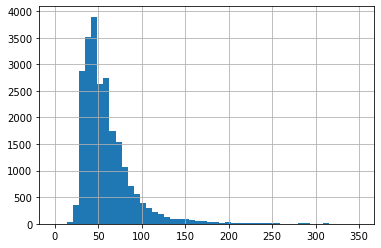

In [48]:
df['total_area'].hist(bins=50,range=(0,350))
plt.show

На графике видно, что пик в райне 50м после 100м значений уже давольно мало 

In [49]:
df['last_price'].describe().T

count        23,698.00
mean      6,540,463.94
std      10,885,961.96
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,750.00
max     763,000,000.00
Name: last_price, dtype: float64

Средняя стоимость, квартиры 6.5м, есть выброс в 12.190 тыс а так же в 763м 

In [50]:
df['last_price'].median()

4650000.0

<function matplotlib.pyplot.show(close=None, block=None)>

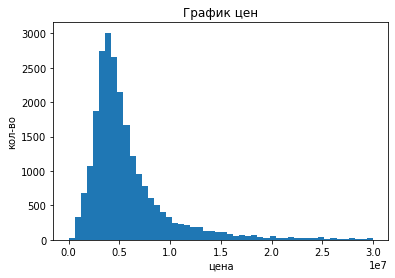

In [51]:
#df['last_price'].hist(bins=50,range=(0,30000000))
fig, ax = plt.subplots()
ax.hist(df['last_price'],bins=50,range=(0,30000000))
ax.set_title('График цен')
ax.set_xlabel('цена')
ax.set_ylabel('кол-во')

plt.show

Тут с графиком цены дела не очень, насколько понятно цены в степени, пик от 4м до 5м после 10м спад 

In [52]:
df['rooms'].describe().T

count   23,698.00
mean         2.07
std          1.07
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         16.00
Name: rooms, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

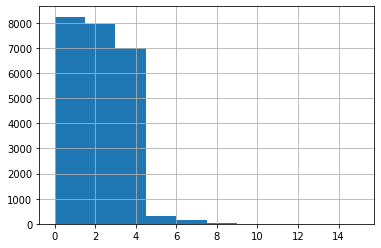

In [53]:
df['rooms'].hist(bins=10,range=(0,15))
plt.show

По комнатам основные значения от 1 до 4 комнат, после 4 резкий спда

In [54]:
df['ceiling_height'].describe().T 

count   23,698.00
mean         2.77
std          0.99
min          1.00
25%          2.60
50%          2.72
75%          2.77
max        100.00
Name: ceiling_height, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

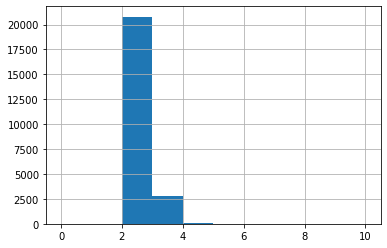

In [55]:
df['ceiling_height'].hist(bins=10,range=(0,10))
plt.show

Потолки чаще всего 2, реже 4, выше 4 уже выбросы 

### Избавимся от выбросов

In [56]:
df['days_exposition'].describe().T

count   23,698.00
mean       156.48
std        213.65
min         -1.00
25%         22.00
50%         74.00
75%        199.00
max      1,580.00
Name: days_exposition, dtype: float64

In [57]:
#df = df.query('days_exposition > 1')

In [58]:
df['days_exposition'].describe()

count   23,698.00
mean       156.48
std        213.65
min         -1.00
25%         22.00
50%         74.00
75%        199.00
max      1,580.00
Name: days_exposition, dtype: float64

In [59]:
#Код ревьюера
df['days_exposition'].replace(-1, -1000).describe()

count   23,698.00
mean        22.38
std        451.52
min     -1,000.00
25%         22.00
50%         74.00
75%        199.00
max      1,580.00
Name: days_exposition, dtype: float64

In [60]:
df['days_exposition'].median()

74.0

In [61]:
df['days_exposition'].describe().T

count   23,698.00
mean       156.48
std        213.65
min         -1.00
25%         22.00
50%         74.00
75%        199.00
max      1,580.00
Name: days_exposition, dtype: float64

In [62]:
df = df.query('days_exposition >=0')

count   20,517.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

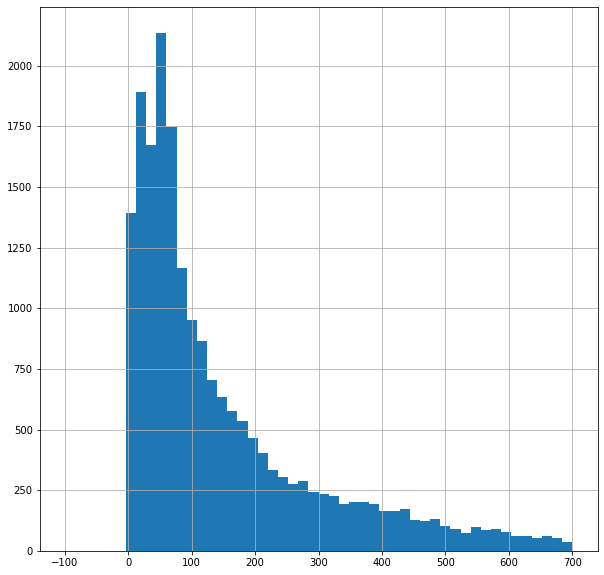

In [63]:
df['days_exposition'].hist(bins=50,range=(-100,700),figsize=(10,10))
plt.show
df['days_exposition'].describe().T

Среднее время продажи в районе 74 дней,продажа затянулась прошло более 200+ дней
Быстройпродажей можно считать до 22 дней 

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"20,517.00",9.61,5.66,0.00,6.00,9.00,14.00,50.00
last_price,"20,517.00","6,264,906.07","10,861,732.48","12,190.00","3,400,000.00","4,500,000.00","6,500,000.00","763,000,000.00"
total_area,"20,517.00",58.63,34.02,12.00,39.00,50.00,67.00,900.00
rooms,"20,517.00",2.02,1.05,0.00,1.00,2.00,3.00,16.00
ceiling_height,"20,517.00",2.76,0.97,1.00,2.60,2.72,2.77,100.00
floors_total,"20,517.00",10.87,6.65,1.00,5.00,9.00,16.00,60.00
living_area,"20,517.00",33.26,21.01,2.00,18.00,30.00,42.00,409.00
floor,"20,517.00",5.99,4.94,1.00,2.00,4.00,8.00,33.00
kitchen_area,"20,517.00",10.15,5.85,2.00,7.00,9.00,11.00,112.00
balcony,"20,517.00",0.59,0.95,0.00,0.00,0.00,1.00,5.00


Анамальные значения:
last_price 12.000 и 763 млн 
total_area 12 and 900 
rooms 0 and 16
ceiling_heigh 1 and 100
floors_total 60
living_area 2 and 409
floor 1 and 33
kitchen_area 1 and 112

In [65]:
df = df.query('total_area < 150') 

In [66]:
df['total_area'].describe()

count   20,084.00
mean        55.25
std         22.16
min         12.00
25%         39.00
50%         50.00
75%         66.00
max        149.00
Name: total_area, dtype: float64

Избавимся от плоащадей больше 100м2

In [67]:
df = df.query('last_price > 12190 and last_price < 763000000')

In [68]:
df['last_price'].describe()

count        20,083.00
mean      5,486,478.00
std       4,240,676.59
min         430,000.00
25%       3,380,888.50
50%       4,500,000.00
75%       6,300,000.00
max     124,000,000.00
Name: last_price, dtype: float64

Убрали слишком дешовую 12190т и 763м

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"20,083.00",9.58,5.62,0.00,6.00,9.00,13.00,50.00
last_price,"20,083.00","5,486,478.00","4,240,676.59","430,000.00","3,380,888.50","4,500,000.00","6,300,000.00","124,000,000.00"
total_area,"20,083.00",55.25,22.15,12.00,39.00,50.00,66.00,149.00
rooms,"20,083.00",1.96,0.94,0.00,1.00,2.00,3.00,7.00
ceiling_height,"20,083.00",2.75,0.98,1.00,2.60,2.72,2.77,100.00
floors_total,"20,083.00",10.93,6.67,1.00,5.00,9.00,16.00,60.00
living_area,"20,083.00",31.40,15.04,2.00,18.00,30.00,40.00,163.00
floor,"20,083.00",6.00,4.95,1.00,2.00,4.00,8.00,33.00
kitchen_area,"20,083.00",9.76,4.70,2.00,7.00,9.00,11.00,93.00
balcony,"20,083.00",0.59,0.95,0.00,0.00,0.00,1.00,5.00


Отстались ceiling_height потолки в 100 метров и floors_total 60

In [70]:
df = df.query('ceiling_height < 5' )

In [71]:
df['ceiling_height'].describe()

count   20,057.00
mean         2.73
std          0.20
min          1.00
25%          2.60
50%          2.72
75%          2.77
max          4.80
Name: ceiling_height, dtype: float64

Убрали потолки в 100 метров 

<function matplotlib.pyplot.show(close=None, block=None)>

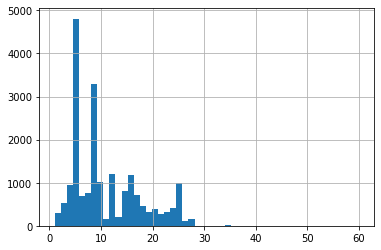

In [72]:
df['floors_total'].hist(bins=50)
plt.show

In [73]:
df = df.query('floors_total < 30' )

In [74]:
df['floors_total'].describe()

count   20,033.00
mean        10.90
std          6.61
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         29.00
Name: floors_total, dtype: float64

Убрали где этажей больше 30 

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"20,033.00",9.58,5.62,0.00,6.00,9.00,13.00,50.00
last_price,"20,033.00","5,486,913.74","4,244,186.91","430,000.00","3,380,000.00","4,500,000.00","6,300,000.00","124,000,000.00"
total_area,"20,033.00",55.26,22.16,12.00,39.00,50.00,66.00,149.00
rooms,"20,033.00",1.96,0.94,0.00,1.00,2.00,3.00,7.00
ceiling_height,"20,033.00",2.73,0.20,1.00,2.60,2.72,2.77,4.80
floors_total,"20,033.00",10.90,6.61,1.00,5.00,9.00,16.00,29.00
living_area,"20,033.00",31.41,15.04,2.00,18.00,30.00,40.00,163.00
floor,"20,033.00",5.98,4.93,1.00,2.00,4.00,8.00,27.00
kitchen_area,"20,033.00",9.76,4.69,2.00,7.00,9.00,11.00,93.00
balcony,"20,033.00",0.59,0.95,0.00,0.00,0.00,1.00,5.00


In [76]:
df = df.query('days_exposition < 600' )

<function matplotlib.pyplot.show(close=None, block=None)>

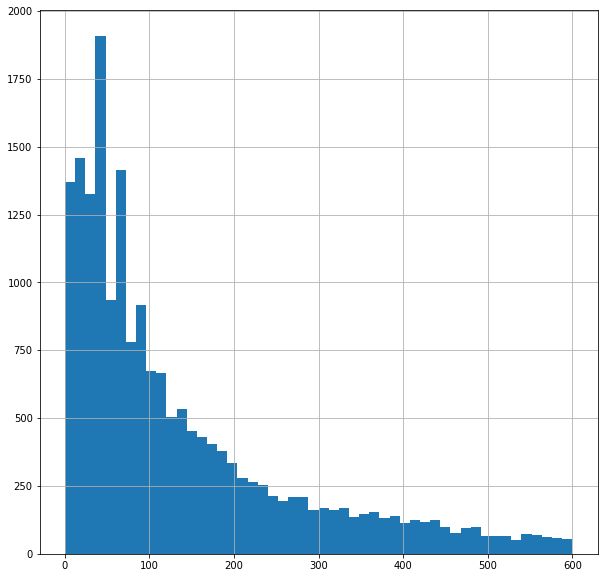

In [77]:
df['days_exposition'].hist(bins=50,range=(0,600),figsize=(10,10))
plt.show

Пик остался так же в районе 30 дней, быстрая продажа до 30 дней 

<function matplotlib.pyplot.show(close=None, block=None)>

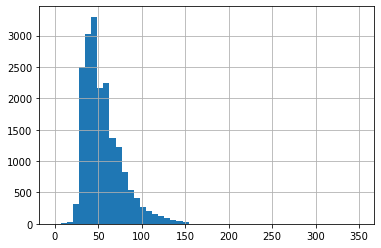

In [78]:
df['total_area'].hist(bins=50,range=(0,350))
plt.show

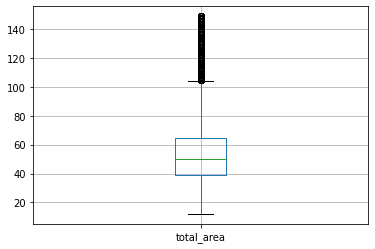

In [79]:
boxplot = df.boxplot(column=['total_area'])

После удаления выбросов пик площади остался без изменений 

удаление выбрсово не повлияло на пики, хвосты и редкие значения удалили 

### Факторы влияния


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

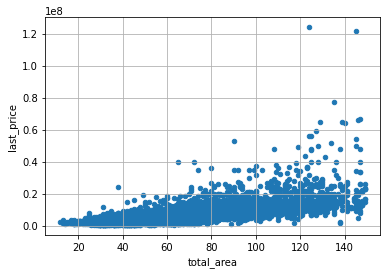

In [80]:
df.plot(x= 'total_area',y ='last_price' ,kind = 'scatter',grid=True)

In [81]:
df['last_price'].corr(df['total_area'])

0.6894591572417276

По графику и корреляции видно зависимость цены от площади 

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

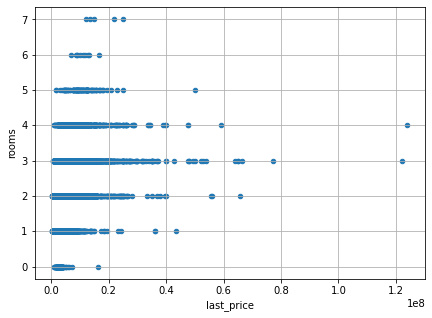

In [82]:
df.plot(x='last_price', y='rooms', kind='scatter', grid=True, figsize=(7,5))

In [83]:
df['last_price'].corr(df['rooms'])

0.4037714230605524

По коээфиценту Пирсона зависимость конечно есть но уже не такая сильная как с total_area 

<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

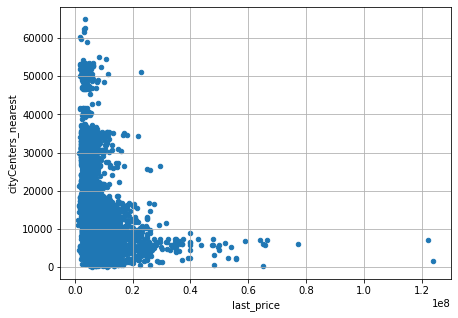

In [84]:
df.plot(x='last_price', y='cityCenters_nearest', kind='scatter', grid=True, figsize=(7,5))

In [85]:
df['cityCenters_nearest'].dtype

dtype('float64')

In [86]:
df['last_price'].corr(df['cityCenters_nearest'])

-0.3057740425279453

Коэффицент близок к 0,но все таки на графике связь есть 

<AxesSubplot:xlabel='last_price', ylabel='floor'>

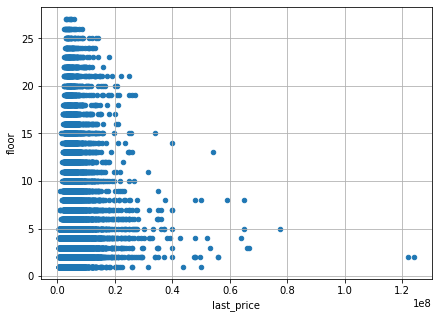

In [87]:
df.plot(x='last_price', y='floor', kind='scatter', grid=True, figsize=(7,5))

In [88]:
import seaborn as sns

In [89]:
floor_price = df.pivot_table(index='floor_type',values = ['last_price'],aggfunc='mean')

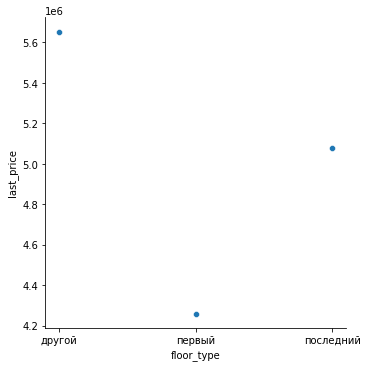

In [90]:
sns.relplot(x='floor_type', y='last_price', data=floor_price)

In [91]:
df['last_price'].corr(df['floor'])

0.06359319014887307

Судя по графику самая низкая цена на первом, на последних этажах разница в цене чуть выше, самая высокая цена посередине 

In [92]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,weekday,month,year,week_day,week_day1,price_meter,floor_type,ratio_living,ratio_kitchen
1,7,3350000,40,2018-12-04,1,2.72,11,18,1,unknown,...,81,1,12,2018,Tuesday,2,"186,111.11",первый,0.45,0.28
2,10,5196000,56,2015-08-20,2,2.76,5,34,4,unknown,...,558,3,8,2015,Thursday,4,"152,823.53",другой,0.61,0.14
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,unknown,...,121,1,6,2018,Tuesday,2,"312,500.00",другой,0.32,0.41
5,10,2890000,30,2018-09-10,1,2.72,12,14,5,unknown,...,55,0,9,2018,Monday,1,"206,428.57",другой,0.47,0.30
6,6,3700000,37,2017-11-02,1,2.72,26,10,6,unknown,...,155,3,11,2017,Thursday,4,"370,000.00",другой,0.27,0.38


In [93]:
day_info = df.pivot_table(index = ['weekday','month','year'] ,values ='last_price',aggfunc='mean').reset_index()

display(day_info)

,weekday,month,year,last_price
0,0,1,2015,"5,493,323.33"
1,0,1,2016,"5,833,857.14"
2,0,1,2017,"5,105,440.68"
3,0,1,2018,"5,297,462.83"
4,0,1,2019,"5,377,875.00"
...,...,...,...,...
363,6,11,2018,"5,374,924.14"
364,6,12,2015,"5,274,500.00"
365,6,12,2016,"5,577,500.00"
366,6,12,2017,"5,307,434.21"


In [94]:
#day_info.plot(grid=True)

In [95]:
#pd.plotting.scatter_matrix(day_info, figsize=(9, 9))

Пытался сделать через сводные таблицы, но что - то пошло не так ) Очень хочется подсказку как построить график с pivot_table 


<AxesSubplot:xlabel='last_price', ylabel='year'>

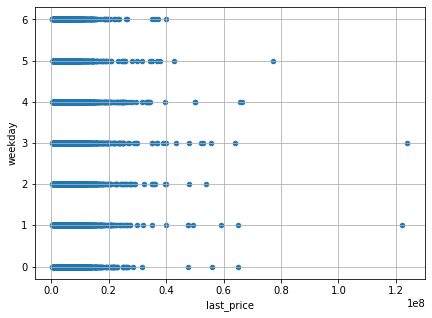

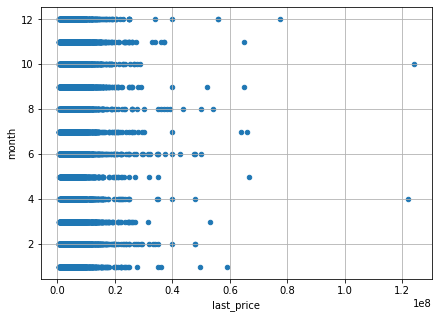

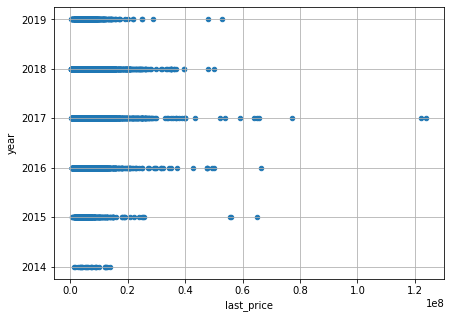

In [96]:
df.plot(x='last_price', y='weekday', kind='scatter',grid=True, figsize=(7,5))
df.plot(x='last_price', y='month', kind='scatter',grid=True, figsize=(7,5))
df.plot(x='last_price', y='year', kind='scatter',grid=True, figsize=(7,5))


По этим графикам видно что с каждым годом цена выростала 

array([[<AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='weekday', ylabel='month'>,
        <AxesSubplot:xlabel='year', ylabel='month'>],
       [<AxesSubplot:xlabel='month', ylabel='weekday'>,
        <AxesSubplot:xlabel='weekday', ylabel='weekday'>,
        <AxesSubplot:xlabel='year', ylabel='weekday'>],
       [<AxesSubplot:xlabel='month', ylabel='year'>,
        <AxesSubplot:xlabel='weekday', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>]], dtype=object)

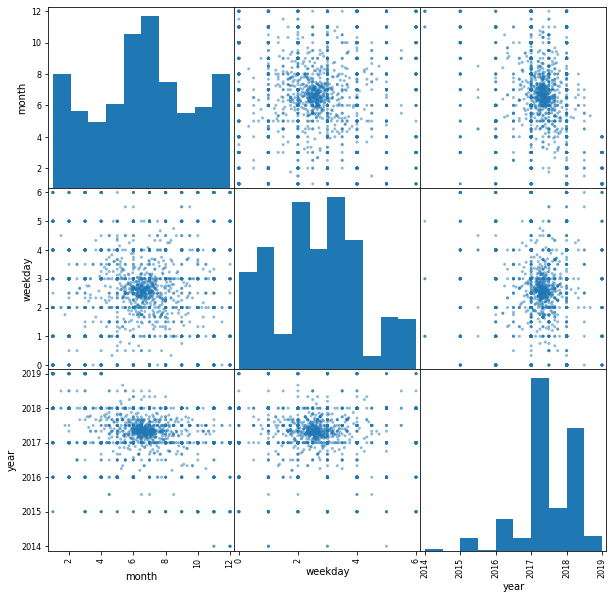

In [97]:
matrix = df.pivot_table(index='last_price', values=['weekday','month','year'])
pd.plotting.scatter_matrix(matrix, figsize=(10,10))

Такой график тяжело читать, что вижу - летом цены выше, с годами цена росла но в 2018 был спад 

<AxesSubplot:>

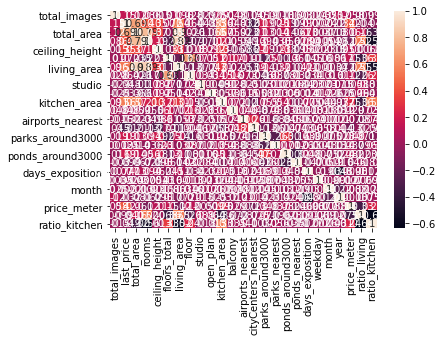

In [98]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

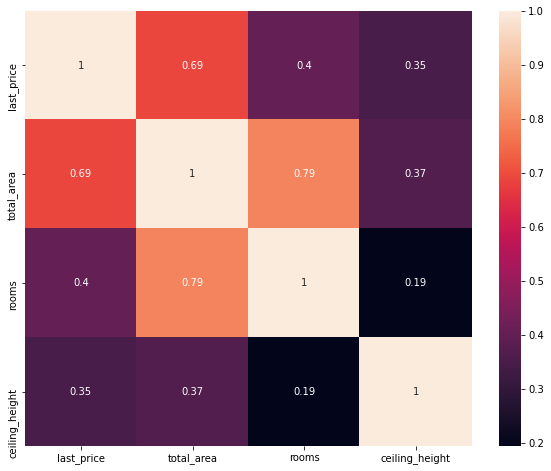

In [130]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['last_price', 'total_area', 'rooms', 'ceiling_height']].corr(),annot=True)

In [99]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,price_meter,ratio_living,ratio_kitchen
total_images,1.00,0.15,0.12,0.09,0.01,0.01,0.10,0.03,-0.03,-0.03,...,-0.00,-0.02,-0.00,0.00,-0.00,0.02,0.12,0.06,-0.01,-0.01
last_price,0.15,1.00,0.69,0.40,0.35,0.07,0.54,0.06,-0.05,-0.03,...,0.02,0.19,-0.10,0.08,-0.00,0.00,-0.03,0.42,-0.04,-0.05
total_area,0.12,0.69,1.00,0.79,0.37,-0.03,0.90,-0.03,-0.11,-0.07,...,0.01,0.14,-0.07,0.13,-0.00,0.00,-0.08,0.06,0.16,-0.32
rooms,0.09,0.40,0.79,1.00,0.19,-0.22,0.89,-0.17,-0.17,-0.11,...,-0.04,0.06,-0.03,0.09,-0.00,-0.00,-0.06,-0.12,0.52,-0.56
ceiling_height,0.01,0.35,0.37,0.19,1.00,-0.03,0.31,-0.02,0.08,0.09,...,-0.02,0.18,-0.09,0.06,0.00,0.00,-0.10,0.11,0.00,0.01
floors_total,0.01,0.07,-0.03,-0.22,-0.03,1.00,-0.17,0.68,0.07,0.05,...,0.10,-0.13,0.06,-0.05,0.02,0.01,0.02,0.15,-0.36,0.33
living_area,0.10,0.54,0.90,0.89,0.31,-0.17,1.00,-0.13,-0.07,-0.04,...,-0.03,0.11,-0.04,0.11,-0.00,-0.00,-0.07,-0.12,0.55,-0.52
floor,0.03,0.06,-0.03,-0.17,-0.02,0.68,-0.13,1.00,0.03,0.03,...,0.09,-0.08,0.03,-0.03,0.01,0.02,0.01,0.12,-0.26,0.24
studio,-0.03,-0.05,-0.11,-0.17,0.08,0.07,-0.07,0.03,1.00,-0.00,...,0.01,0.00,0.01,-0.02,-0.00,0.00,0.02,-0.01,0.09,-0.02
open_plan,-0.03,-0.03,-0.07,-0.11,0.09,0.05,-0.04,0.03,-0.00,1.00,...,0.01,0.00,-0.00,-0.02,0.01,0.03,-0.02,-0.01,0.06,-0.01


### Населенные пункты 


In [100]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,weekday,month,year,week_day,week_day1,price_meter,floor_type,ratio_living,ratio_kitchen
1,7,3350000,40,2018-12-04,1,2.72,11,18,1,unknown,...,81,1,12,2018,Tuesday,2,"186,111.11",первый,0.45,0.28
2,10,5196000,56,2015-08-20,2,2.76,5,34,4,unknown,...,558,3,8,2015,Thursday,4,"152,823.53",другой,0.61,0.14
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,unknown,...,121,1,6,2018,Tuesday,2,"312,500.00",другой,0.32,0.41
5,10,2890000,30,2018-09-10,1,2.72,12,14,5,unknown,...,55,0,9,2018,Monday,1,"206,428.57",другой,0.47,0.30
6,6,3700000,37,2017-11-02,1,2.72,26,10,6,unknown,...,155,3,11,2017,Thursday,4,"370,000.00",другой,0.27,0.38


In [101]:
df.pivot_table(index='locality_name',values='price_meter',aggfunc='mean').sort_values(by='price_meter',ascending = False).head(10)

,price_meter
locality_name,
посёлок Лисий Нос,"429,705.88"
Санкт-Петербург,"210,606.65"
Зеленогорск,"209,204.52"
Сестрорецк,"204,125.03"
Кудрово,"204,114.55"
посёлок Парголово,"200,559.89"
поселок станции Корнево,"198,000.00"
Пушкин,"192,701.58"
деревня Мистолово,"191,639.15"


Топ 10 по высокой  стоимости 

In [102]:
df_top = df.pivot_table(index='locality_name',values='price_meter',aggfunc='mean').sort_values(by='price_meter',ascending = True).head(10)
display(df_top)

,price_meter
locality_name,
деревня Вахнова Кара,"14,516.13"
деревня Малая Романовка,"14,912.28"
посёлок станции Свирь,"18,935.48"
деревня Выскатка,"19,010.42"
поселок станции Лужайка,"19,148.94"
поселок Тёсово-4,"20,833.33"
деревня Старополье,"23,235.29"
поселок Житково,"23,255.81"
поселок городского типа Ефимовский,"23,269.08"


Топ 10 по низкой стоимости 

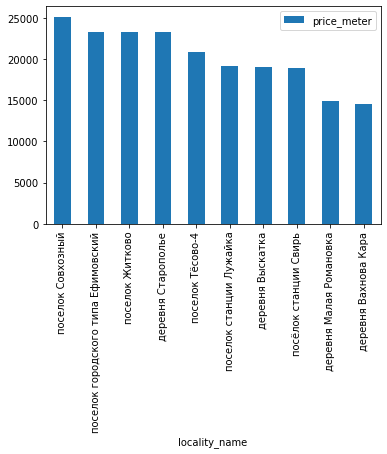

In [103]:

df_top.sort_values(by=('price_meter'), ascending=False).plot(kind='bar')
plt.show()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Результат по ценам в зависимости от местоположения квартир получен, можно привести график зависимости цены от местоположения.

</div>

<div class="alert alert-info">
Добавил диаграмму 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Старайся всегда визуализировать получаемую в работе информацию.

</div>

### Расстояние до центра 


In [104]:
df['cityCenters_km'] = (df['cityCenters_nearest'] / 1000).round(0)
#округляем и переводим в километры 

In [105]:
spb = df.query('locality_name == "Санкт-Петербург"')
spb = spb.pivot_table(index = 'cityCenters_km',values = 'last_price',aggfunc='mean').sort_values(by='cityCenters_km')

<AxesSubplot:xlabel='cityCenters_km'>

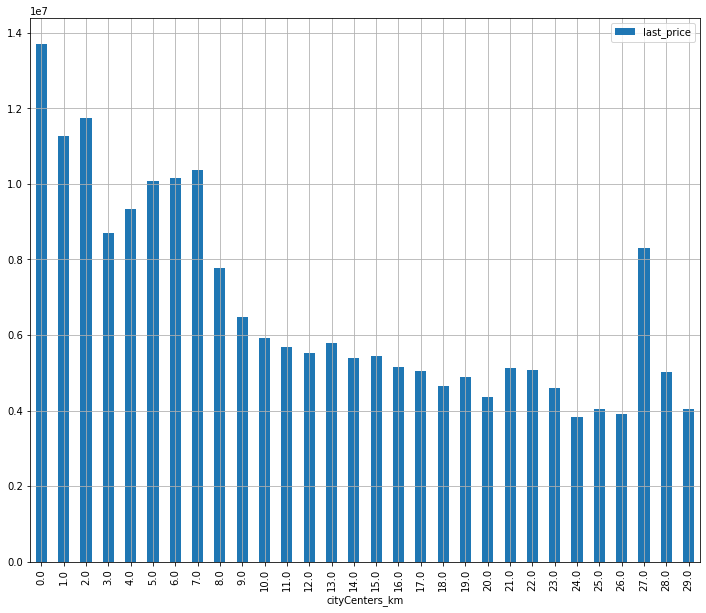

In [106]:
spb.plot(y='last_price',kind='bar',figsize= (12,10), grid=True)

Похоже, что радиус от 0 - 8 км 

In [107]:
df_centr = df.query('locality_name == "Санкт-Петербург" and cityCenters_km <= 8')

In [108]:
df_centr.count()

total_images            2788
last_price              2788
total_area              2788
first_day_exposition    2788
rooms                   2788
ceiling_height          2788
floors_total            2788
living_area             2788
floor                   2788
is_apartment            2788
studio                  2788
open_plan               2788
kitchen_area            2788
balcony                 2788
locality_name           2788
airports_nearest        2786
cityCenters_nearest     2788
parks_around3000        2788
parks_nearest           1780
ponds_around3000        2788
ponds_nearest           1979
days_exposition         2788
weekday                 2788
month                   2788
year                    2788
week_day                2788
week_day1               2788
price_meter             2788
floor_type              2788
ratio_living            2788
ratio_kitchen           2788
cityCenters_km          2788
dtype: int64

Имеем 2035 квартир 

<AxesSubplot:>

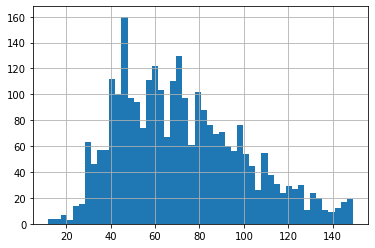

In [109]:
df_centr['total_area'].hist(bins=50)

Тут имеем несолько пиков в районе 50м2 и 60м2 

<function matplotlib.pyplot.show(close=None, block=None)>

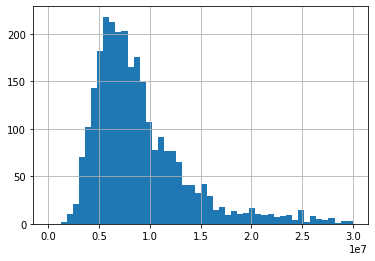

In [110]:
df_centr['last_price'].hist(bins=50,range=(0,30000000))
plt.show

Насколько видно по графику пик от 5млн до 9 млн 

<function matplotlib.pyplot.show(close=None, block=None)>

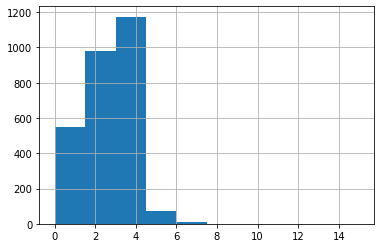

In [111]:
df_centr['rooms'].hist(bins=10,range=(0,15))
plt.show

Здесь преобладают комнаты от 2 до 4 

<function matplotlib.pyplot.show(close=None, block=None)>

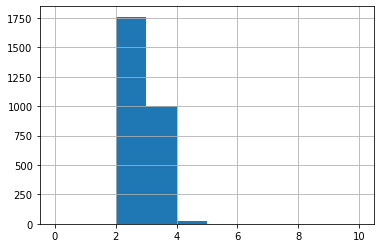

In [112]:
df_centr['ceiling_height'].hist(bins=10,range=(0,10))
plt.show

In [113]:
def hist_fucn (data):
    data.hist(bins=10,range=(0,10))
    return plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

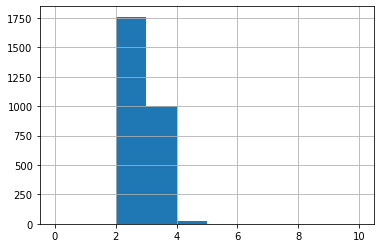

In [114]:
hist_fucn(df_centr['ceiling_height'])

Пик от 2 до 2.5 метров 


<function matplotlib.pyplot.show(close=None, block=None)>

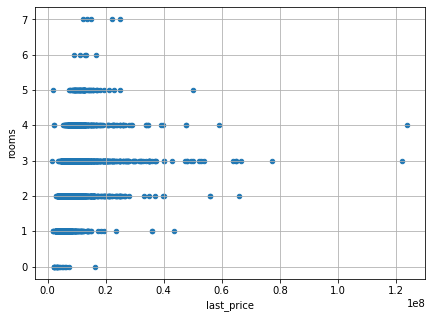

In [115]:
df_centr.plot(x='last_price', y='rooms', kind='scatter', grid=True, figsize=(7,5))
plt.show


По графику зависимости цены к кол-ву комнт преобладают 2 и 3 комнатные 

<function matplotlib.pyplot.show(close=None, block=None)>

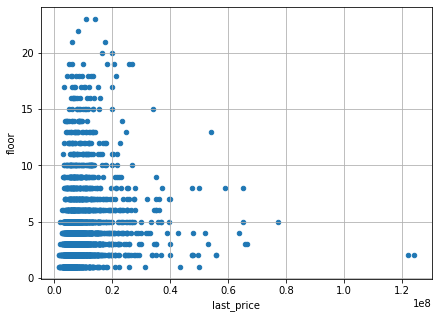

In [116]:
df_centr.plot(x='last_price', y='floor', kind='scatter', grid=True, figsize=(7,5))
plt.show

По графику зависимости этажа к цене, видно что самая высокая цена посередине (от 3 и до 10 ) 

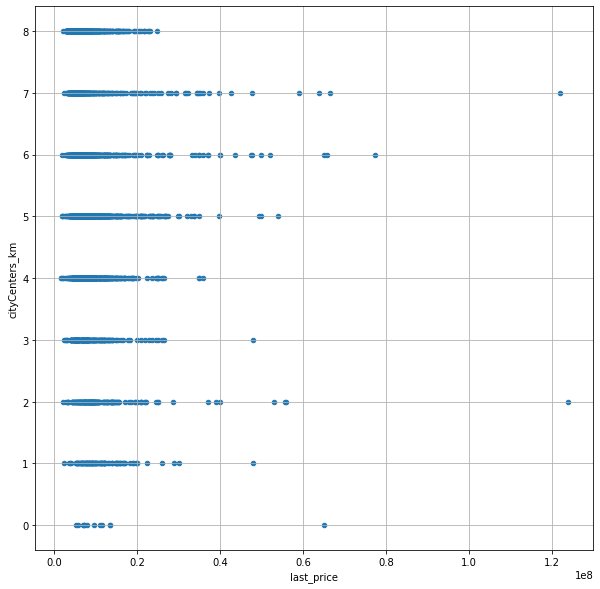

In [117]:
df_centr.plot(x='last_price', y='cityCenters_km', kind='scatter', grid=True, figsize=(10,10))
plt.show()

Похоже что квартиры в центре дороже но по графику не очень это понимаю 

<function matplotlib.pyplot.show(close=None, block=None)>

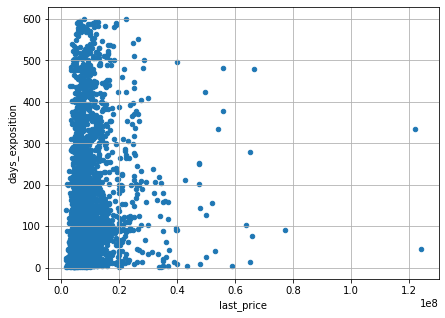

In [118]:
df_centr.plot(x='last_price', y='days_exposition', kind='scatter', grid=True, figsize=(7,5))
plt.show

Не вижу взаимсовязи даты размещения к цене 

In [119]:
print('Корреляция по центру')
display(df_centr[['total_area','last_price', 'rooms', 'ceiling_height']].corr())
print()
print('Корреляция по всей таблице')
display(df[['total_area','last_price', 'rooms', 'ceiling_height']].corr())

Корреляция по центру


,total_area,last_price,rooms,ceiling_height
total_area,1.00,0.61,0.77,0.32
last_price,0.61,1.00,0.31,0.16
rooms,0.77,0.31,1.00,0.29
ceiling_height,0.32,0.16,0.29,1.00



Корреляция по всей таблице


,total_area,last_price,rooms,ceiling_height
total_area,1.00,0.69,0.79,0.37
last_price,0.69,1.00,0.40,0.35
rooms,0.79,0.40,1.00,0.19
ceiling_height,0.37,0.35,0.19,1.00


In [120]:
df_centr['ceiling_height'].describe()

count   2,788.00
mean        2.92
std         0.29
min         2.40
25%         2.76
50%         2.77
75%         3.01
max         4.80
Name: ceiling_height, dtype: float64

In [121]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,weekday,month,year,week_day,week_day1,price_meter,floor_type,ratio_living,ratio_kitchen,cityCenters_km
1,7,3350000,40,2018-12-04,1,2.72,11,18,1,unknown,...,1,12,2018,Tuesday,2,"186,111.11",первый,0.45,0.28,19.00
2,10,5196000,56,2015-08-20,2,2.76,5,34,4,unknown,...,3,8,2015,Thursday,4,"152,823.53",другой,0.61,0.14,14.00
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,unknown,...,1,6,2018,Tuesday,2,"312,500.00",другой,0.32,0.41,8.00
5,10,2890000,30,2018-09-10,1,2.72,12,14,5,unknown,...,0,9,2018,Monday,1,"206,428.57",другой,0.47,0.30,NaN
6,6,3700000,37,2017-11-02,1,2.72,26,10,6,unknown,...,3,11,2017,Thursday,4,"370,000.00",другой,0.27,0.38,19.00
8,20,2900000,33,2018-05-23,1,2.72,27,15,26,unknown,...,2,5,2018,Wednesday,3,"193,333.33",другой,0.45,0.24,NaN
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,unknown,...,6,2,2017,Sunday,7,"125,581.40",другой,0.70,0.10,15.00
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,unknown,...,3,11,2017,Thursday,4,"252,500.00",другой,0.51,0.21,14.00
11,9,3300000,44,2018-08-27,2,2.76,5,31,4,False,...,0,8,2018,Monday,1,"106,451.61",другой,0.70,0.14,52.00
12,10,3890000,54,2016-06-30,2,2.76,5,30,5,unknown,...,3,6,2016,Thursday,4,"129,666.67",последний,0.56,0.17,NaN


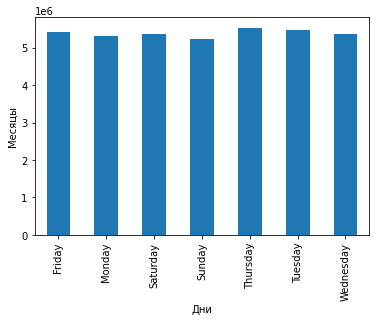

In [122]:
fig, ay = plt.subplots()
df.groupby('week_day')['last_price'].mean().plot(kind='bar', title='abc')
ay.set_xlabel('Дни')
ay.set_ylabel('Месяцы')
ay.set_title('')
plt.show()
# Распределени по оргинальному датасету 

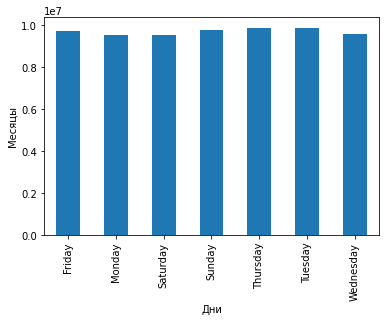

In [123]:
fig, ay = plt.subplots()
df_centr.groupby('week_day')['last_price'].mean().plot(kind='bar', title='abc')
ay.set_xlabel('Дни')
ay.set_ylabel('Месяцы')
ay.set_title('')
plt.show()
# Распределени по срезу Спб 

,weekday,month,year
weekday,1.00,0.01,-0.00
month,0.01,1.00,-0.22
year,-0.00,-0.22,1.00


<AxesSubplot:>

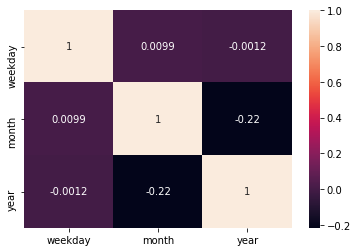

In [124]:
numeric_col = ['weekday','month','year']
corr_matrix = df.loc[:,numeric_col].corr()
display(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
# Матрица корреляцию по оригинальному датасету 

,weekday,month,year
weekday,1.00,0.04,0.02
month,0.04,1.00,-0.20
year,0.02,-0.20,1.00


<AxesSubplot:>

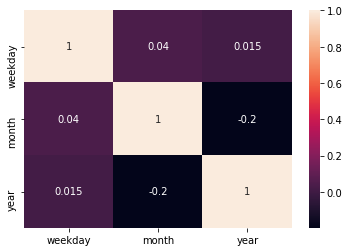

In [125]:
numeric_col = ['weekday','month','year']
corr_matrix = df_centr.loc[:,numeric_col].corr()
display(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
# Матрица корреляцию по срезу СПБ 

,last_price,rooms,total_area
last_price,1.00,0.40,0.69
rooms,0.40,1.00,0.79
total_area,0.69,0.79,1.00


<AxesSubplot:>

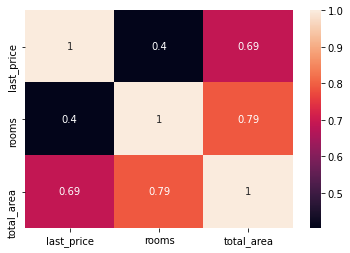

In [126]:
numeric_col = ['last_price','rooms','total_area']
corr_matrix = df.loc[:,numeric_col].corr()
display(corr_matrix)
sns.heatmap(corr_matrix, annot=True)

,last_price,rooms,total_area
last_price,1.00,0.31,0.61
rooms,0.31,1.00,0.77
total_area,0.61,0.77,1.00


<AxesSubplot:>

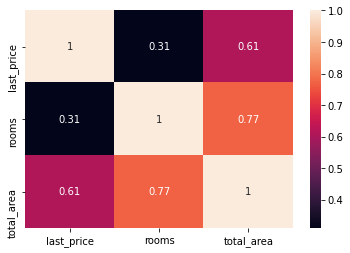

In [127]:
numeric_col = ['last_price','rooms','total_area']
corr_matrix =  df_centr.loc[:,numeric_col].corr()
display(corr_matrix)
sns.heatmap(corr_matrix, annot=True)

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"18,892.00",9.62,5.63,0.00,6.00,9.00,14.00,50.00
last_price,"18,892.00","5,407,839.87","4,117,422.77","430,000.00","3,350,000.00","4,450,000.00","6,200,000.00","124,000,000.00"
total_area,"18,892.00",54.75,21.73,12.00,39.00,50.00,65.00,149.00
rooms,"18,892.00",1.95,0.93,0.00,1.00,2.00,3.00,7.00
ceiling_height,"18,892.00",2.72,0.19,1.00,2.60,2.72,2.77,4.80
floors_total,"18,892.00",10.95,6.62,1.00,5.00,9.00,16.00,29.00
living_area,"18,892.00",31.12,14.78,2.00,18.00,29.00,40.00,163.00
floor,"18,892.00",6.01,4.94,1.00,2.00,4.00,8.00,27.00
kitchen_area,"18,892.00",9.69,4.60,2.00,7.00,9.00,11.00,93.00
balcony,"18,892.00",0.60,0.95,0.00,0.00,0.00,1.00,5.00


In [129]:
df_centr.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"2,788.00",9.78,5.92,0.00,5.00,9.00,14.00,50.00
last_price,"2,788.00","9,698,850.04","7,434,739.75","1,600,000.00","5,881,904.25","7,900,000.00","11,000,000.00","124,000,000.00"
total_area,"2,788.00",72.20,28.15,12.00,49.75,69.00,90.25,149.00
rooms,"2,788.00",2.42,1.04,0.00,2.00,2.00,3.00,7.00
ceiling_height,"2,788.00",2.92,0.29,2.40,2.76,2.77,3.01,4.80
floors_total,"2,788.00",7.78,4.51,2.00,5.00,6.00,10.00,28.00
living_area,"2,788.00",41.49,19.48,2.00,27.00,38.50,53.00,163.00
floor,"2,788.00",4.43,3.28,1.00,2.00,4.00,5.00,23.00
kitchen_area,"2,788.00",12.36,6.80,2.00,8.00,11.00,15.00,93.00
balcony,"2,788.00",0.35,0.79,0.00,0.00,0.00,0.00,5.00


Вывод по разделу:
1. Средняя стоимость в центре выше чем по всему датасету центр - 9м , изначальная база - 5м 
2. В центре средняя площадь больше 72м2 в изначальном 54м2
3. Средня стоимость квм2 в центре больше 260к против 180к в изначальном 

## Общий вывод

1. Избавилисиь от пропусков в датасете и логично заполнили где это было возможно
2. Удалили выбросы и аномальные значения 
3. Произвели рассчеты стоимость м2 а так же соотношение  площади 
4. Выделели параметры которые влияют на стоимость квартиры такие как : площадь, этаж, высота потолков, кол-во комнат, удаленности от центра 
5. Самый дорогой населенный пункт посёлок Лисий Нос	, а самое больше влияние на цену оказывают площадь и расстояние до центра
В целом наша задача определить параметры которая выявит аномалии и мошенническую деятельность, считаю что основные параметры для определения подозрителних значений это: 
1. Слишком большая или маленька площадь (для завышения или занижения цен)
2. Слишком низкие цены а так же слишком высокие 
3. Объявления которые размещенны слишком долго 
4. Нехарактрная высота потолков 